In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("...datasets\\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [5]:
data.duplicated().sum()

1

In [6]:
data = data.drop_duplicates()
data.shape

(1337, 7)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [8]:
data.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

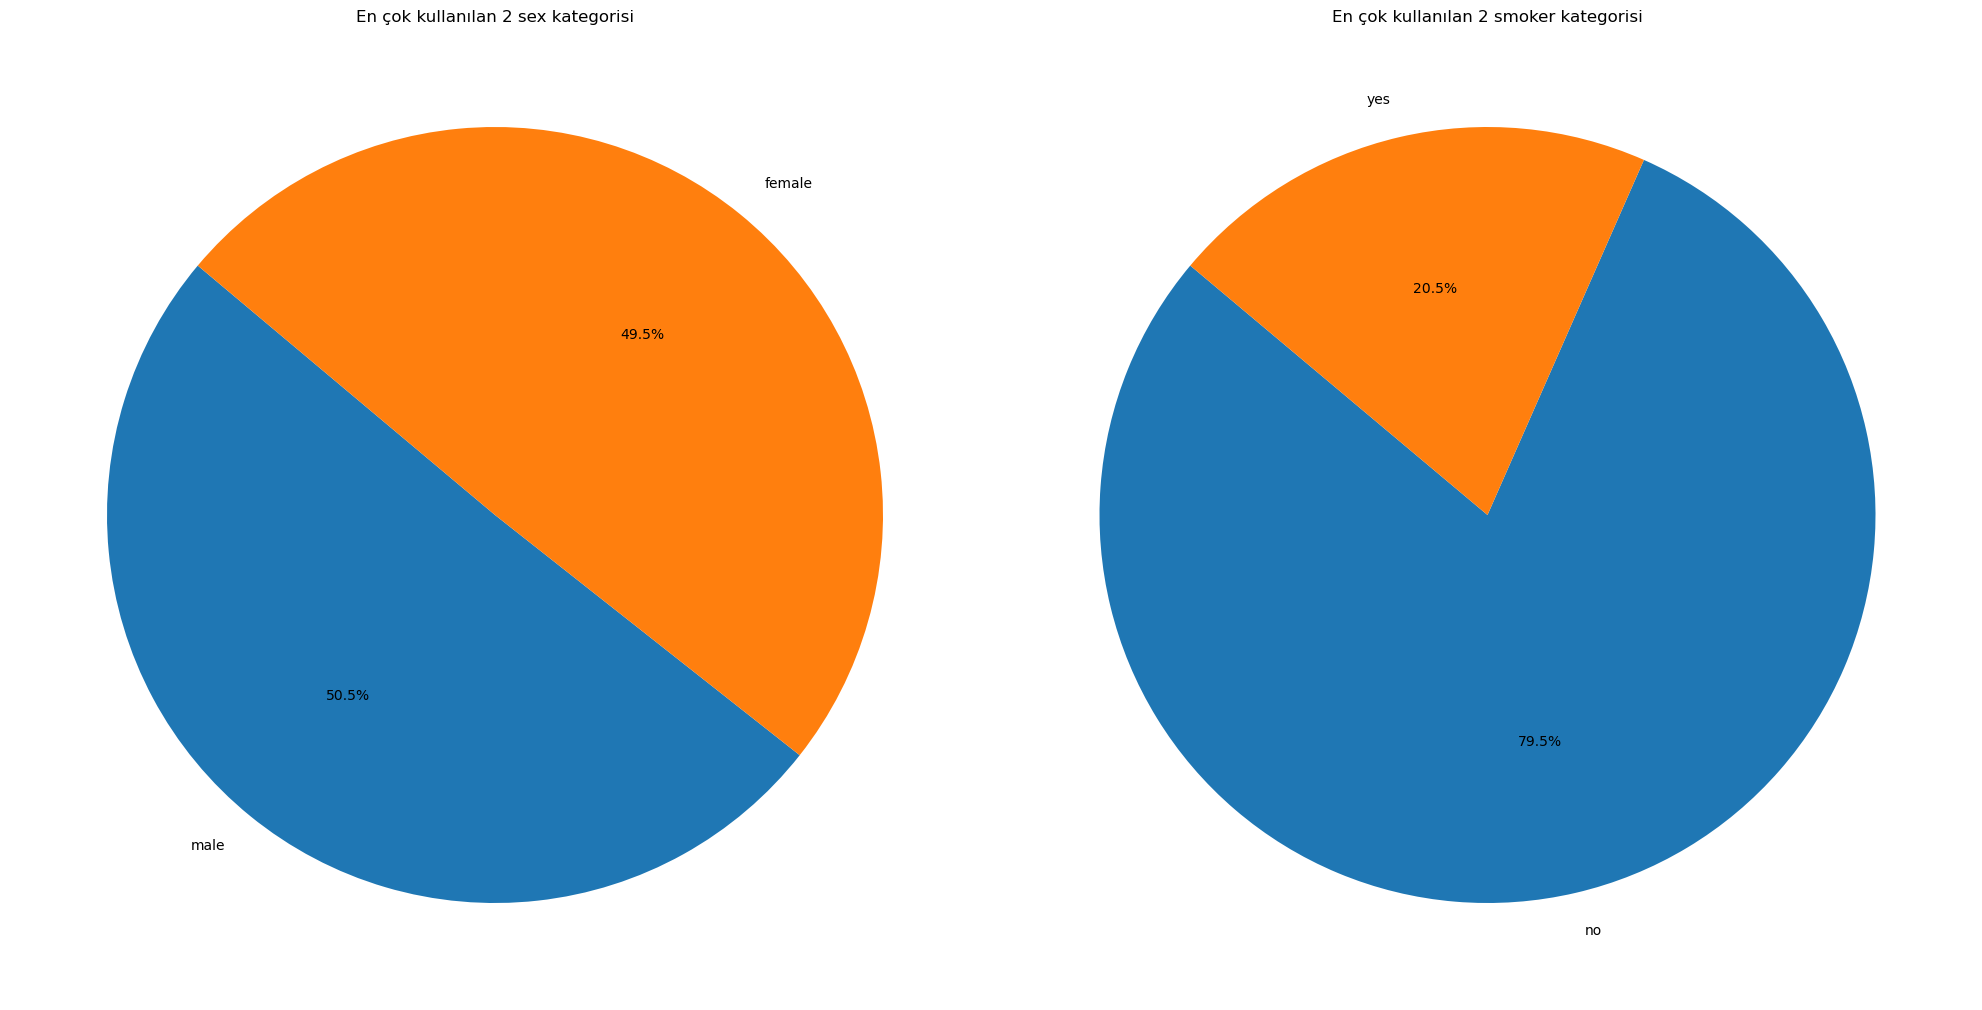

In [9]:
katorogiler = ['sex', 'smoker']

top_n = 2

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for i, column in enumerate(katorogiler):
    value_counts = data[column].value_counts().nlargest(top_n)
    axs[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'En çok kullanılan {top_n} {column} kategorisi')

plt.tight_layout()
plt.show()

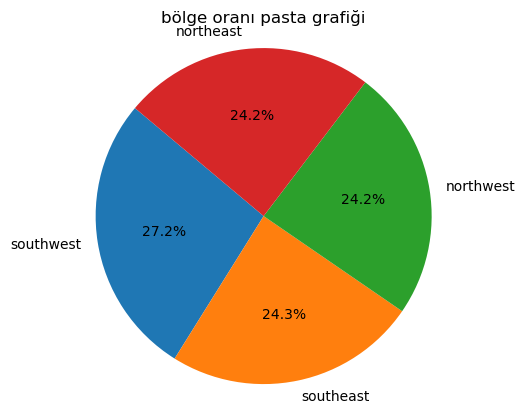

In [10]:
plt.pie(data['region'].value_counts(), labels=data['region'].unique(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('bölge oranı pasta grafiği')
plt.show()

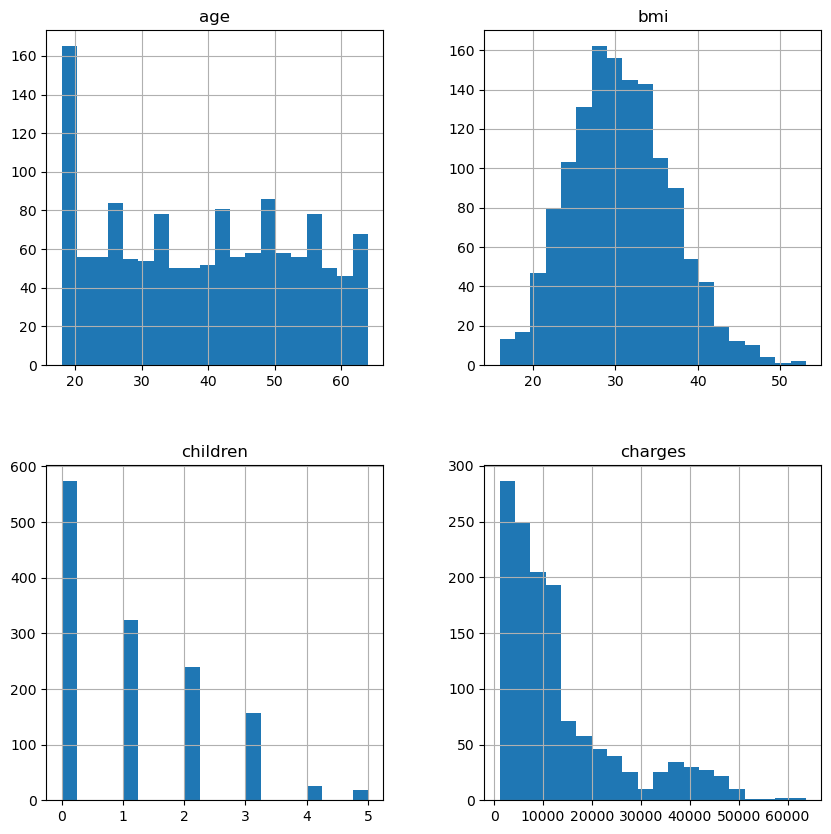

In [11]:
data.hist(bins=20, figsize=(10,10))
plt.show;

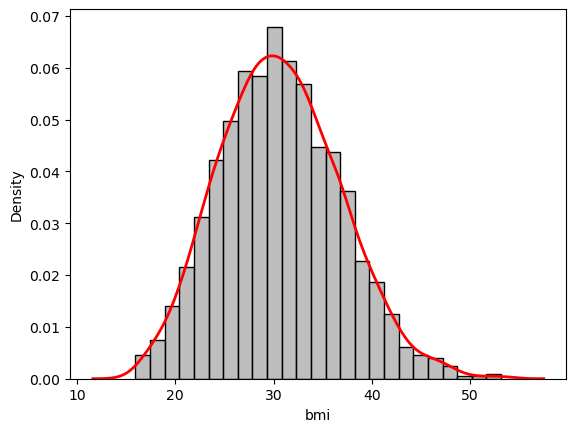

In [12]:
sns.histplot(data, x="bmi",color="darkgrey",stat="density")
sns.kdeplot(data, x="bmi", color='red',linewidth=2);

<Axes: >

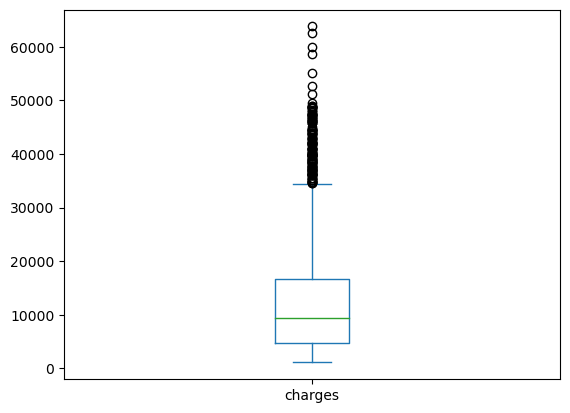

In [13]:
data.charges.plot.box()

In [14]:
sexmapping = {
    'female':0,
    'male':1 }

data.sex= data.sex.map(sexmapping)

smokermapping = {
    'yes':0,
    'no':1 }
data.smoker= data.smoker.map(smokermapping)


regionmapping = {
    'southeast':1,
    'southwest':2,
    'northwest':3,
    'northeast':4 }

data.region = data.region.map(regionmapping)

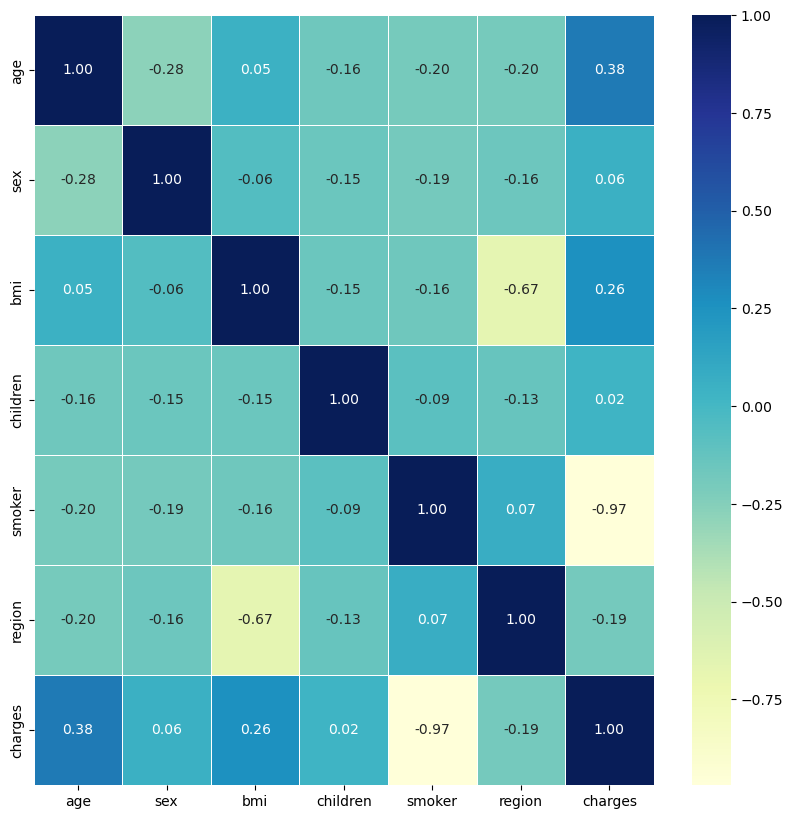

In [15]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr.corr(),cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5);

# MAKİNE ÖĞRENMESİ KISMI

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, Pool
from xgboost import XGBRegressor

In [17]:
Y = data.charges
data.charges.drop
train = data

X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=0)

linear_reg = LinearRegression()
catboost_reg = CatBoostRegressor(task_type="GPU" , verbose= False)
xgboost_reg = XGBRegressor(verbosity=0)

ensemble_model = VotingRegressor(estimators=[
    ('linear', linear_reg),
    ('catboost', catboost_reg),
    ('xgboost', xgboost_reg)
])

In [18]:
param_grid = {  
    'catboost__iterations': [100, 200, 300,400],
    'catboost__depth': [2,3,5,6,8],
    'xgboost__n_estimators': [50, 100, 150],
    'xgboost__max_depth': [3, 4, 5],
    "xgboost__learning_rate": [0.1, 0.01],
}


In [19]:
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=VotingRegressor(estimators=[('linear',
                                                    LinearRegression()),
                                                   ('catboost',
                                                    <catboost.core.CatBoostRegressor object at 0x000001ED687D2470>),
                                                   ('xgboost',
                                                    XGBRegressor(base_score=None,
                                                                 booster=None,
                                                                 callbacks=None,
                                                                 colsample_bylevel=None,
                                                                 colsample_bynode=None,
                                                                 colsample_bytree=None,
                                                                 device=None,
                                                                 early_stopping_rounds=None,
                                                                 enable_categorica...
                                                                 max_leaves=None,
                                                                 min_child_weight=None,
                                                                 missing=nan,
                                                                 monotone_constraints=None,
                                                                 multi_strategy=None,
                                                                 n_estimators=None,
                                                                 n_jobs=None,
                                                                 num_parallel_tree=None,
                                                                 random_state=None, ...))]),
             param_grid={'catboost__depth': [2, 3, 5, 6, 8],
                         'catboost__iterations': [100, 200, 300, 400],
                         'xgboost__learning_rate': [0.1, 0.01],
                         'xgboost__max_depth': [3, 4, 5],
                         'xgboost__n_estimators': [50, 100, 150]})

In [20]:
print("En iyi parametreler:", grid_search.best_params_)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


En iyi parametreler: {'catboost__depth': 2, 'catboost__iterations': 400, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 3, 'xgboost__n_estimators': 100}


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 68438.6067692659
R-squared: 0.999593183243579


In [22]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Tahminler:", y_pred)

Tahminler: [ 1651.19746201  8449.71881503  9321.19263516 32428.4907271
  9654.16262041  2652.65873371  2198.1379764   1259.17417281
  2701.16157819 12369.15931912  8274.58293367 16872.37977784
 13952.19501876  8256.76307635  5513.04588379  2350.74598074
  5326.78255581  3528.78124493  6602.07381016 14722.56226194
  1629.62024629 13140.99241431  1292.49892738  2650.04928549
  1682.99435706  4666.22353764  3728.68987451 11507.03751968
  3740.8552612  37548.89229287  8071.59433795 48075.76990764
 10619.96519985 20732.72167469 14686.05042556 36505.34359675
  8349.94259569 54646.28707295  8411.22671117  1890.70306784
 33386.94818266  2891.02165656  4530.0803453  47573.65206809
 36046.74124119  8225.2338385  19679.62783485  7644.76825493
  9973.0814841   7155.54855459 23821.42169712  4112.1058372
 23473.12302965 40554.8886866  23898.82911886  3081.20880316
  3140.36107198  8850.96986554  9048.99971691 45703.74723813
 12531.19761091 14319.04665984  4230.34593313 28088.05421698
  3989.64476077

In [23]:
result_df = pd.DataFrame({'Gerçek Sonuçlar': y_test, 'Tahmin Edilen Sonuçlar': y_pred})

result_df

,Gerçek Sonuçlar,Tahmin Edilen Sonuçlar
1248,1633.96180,1651.197462
610,8547.69130,8449.718815
393,9290.13950,9321.192635
503,32548.34050,32428.490727
198,9644.25250,9654.162620
...,...,...
809,3309.79260,3329.072092
726,6664.68595,6651.824845
938,2304.00220,2283.092034
474,25382.29700,25414.356040


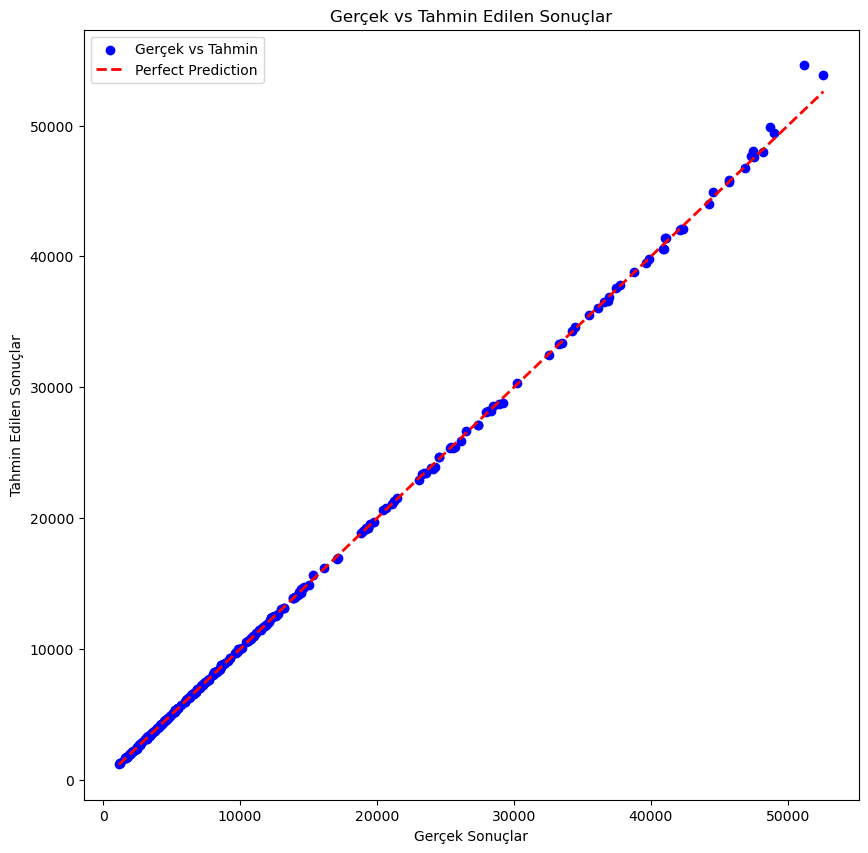

In [24]:
plt.figure(figsize=(10, 10))

plt.scatter(result_df['Gerçek Sonuçlar'], result_df['Tahmin Edilen Sonuçlar'], color='blue', label='Gerçek vs Tahmin')
plt.plot([min(result_df['Gerçek Sonuçlar']), max(result_df['Gerçek Sonuçlar'])], 
         [min(result_df['Gerçek Sonuçlar']), max(result_df['Gerçek Sonuçlar'])], 
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title('Gerçek vs Tahmin Edilen Sonuçlar')
plt.xlabel('Gerçek Sonuçlar')
plt.ylabel('Tahmin Edilen Sonuçlar')
plt.legend()
plt.show()